In [1]:
import numpy as np
import librosa
import glob
import os
from random import randint
import torch
import torch.nn as nn
from torch.utils import data
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb
from Triplet_LSTM_Net import *
from Triplet_LSTM_Dataloader import *

importing Jupyter notebook from Triplet_LSTM_Net.ipynb
importing Jupyter notebook from Triplet_LSTM_Dataloader.ipynb


In [2]:

torch.cuda.set_device(3)
print(torch.cuda.current_device())

3


In [3]:
TLSTMmodel = TripletLSTM().double().cuda()

In [4]:
def plot(loss,mean_loss):
    from IPython import display
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.figure(figsize=(20,10))
    plt.clf()

    plt.title('Training...')
    plt.xlabel('iterator')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(mean_loss)
    plt.show()

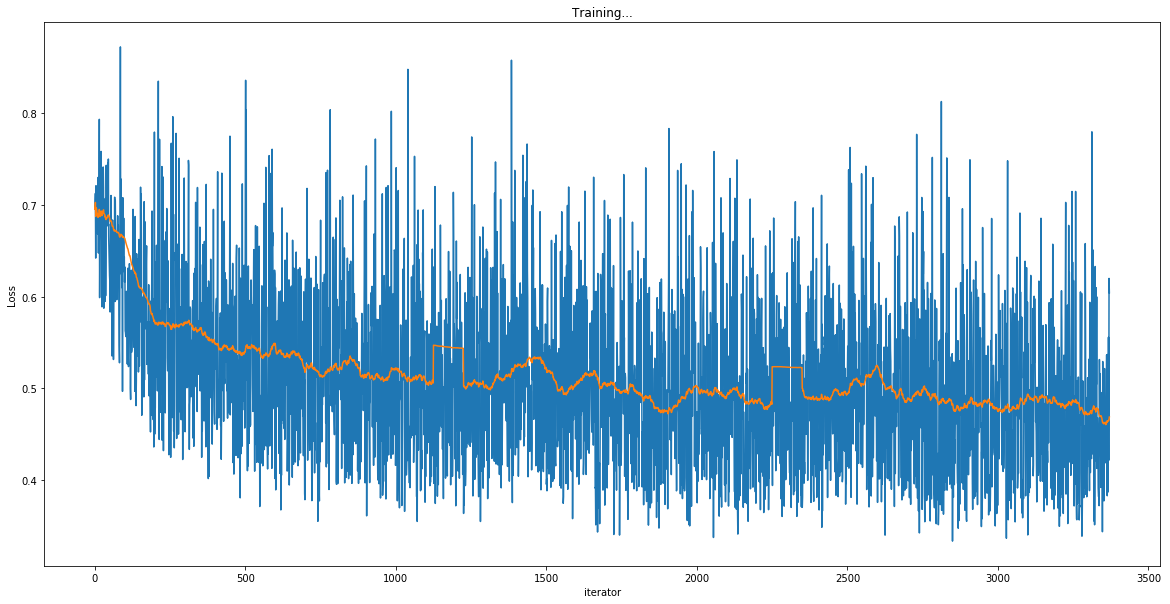

In [5]:
if __name__ == '__main__':
    max_epoch = 3
    optimizer = optim.Adam(TLSTMmodel.parameters(), lr=1e-3)

    weight = [1,0.2]
    class_weights = torch.DoubleTensor(weight).cuda()
    lossFunc = nn.CrossEntropyLoss(weight=class_weights)
    
    cal_loss_list = []
    cal_mean_loss_list = []

    for epoch in range(max_epoch):
        running_loss = 0.0
        for i, data in enumerate(training_generator, 0):
            inputs, labels = data
            labels = labels.cuda()
            x1 = (inputs[...,0]).cuda()
            x2 = (inputs[...,1]).cuda()
            x3 = (inputs[...,2]).cuda()
            optimizer.zero_grad()
            outputs = TLSTMmodel(x1,x2,x3)
            loss = lossFunc(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss = loss.item()
            cal_loss_list.append(running_loss)
            if(i<100):
                cal_mean_loss_list.append(sum(cal_loss_list)/len(cal_loss_list))
            else:
                cal_mean_loss_list.append(sum(cal_loss_list[-100:])/100)

            if(i%10 == 0):
                plot(cal_loss_list,cal_mean_loss_list)


In [6]:
torch.save(TLSTMmodel.state_dict(), './model/tripleNet_LSTM.pkl')
print('Finished Training')

Finished Training


In [7]:
####  every 10 batch to plot one picture
with open('./cal_loss_list_LSTM.txt', 'w') as the_file:
    for token in cal_loss_list:
        the_file.write(str(token)+"\n")
        
with open('./cal_mean_loss_list_LSTM.txt', 'w') as the_file:
    for token in cal_mean_loss_list:
        the_file.write(str(token)+"\n")

print(len(cal_loss_list),len(cal_mean_loss_list))

3375 3375
